In [4]:
import keras
mnist = keras.datasets.mnist
#Cargue la divison de entrenamiento y prueba del conjuto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


In [5]:
import pandas as pd

# Convertir las imágenes de entrenamiento y prueba en DataFrames
training_images_df = pd.DataFrame(training_images.reshape((training_images.shape[0], -1)))
test_images_df = pd.DataFrame(test_images.reshape((test_images.shape[0], -1)))

# Convertir las etiquetas de entrenamiento y prueba en Series
training_labels_df = pd.Series(training_labels, name="label")
test_labels_df = pd.Series(test_labels, name="label")

# Combinar las imágenes y etiquetas en DataFrames
training_df = pd.concat([training_images_df, training_labels_df], axis=1)
test_df = pd.concat([test_images_df, test_labels_df], axis=1)

# Mostrar los DataFrames
print("Training DataFrame:")
print(training_df.head())

print("\nTest DataFrame:")
print(test_df.head())

Training DataFrame:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

Test DataFrame:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0 

In [20]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Label: 0
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

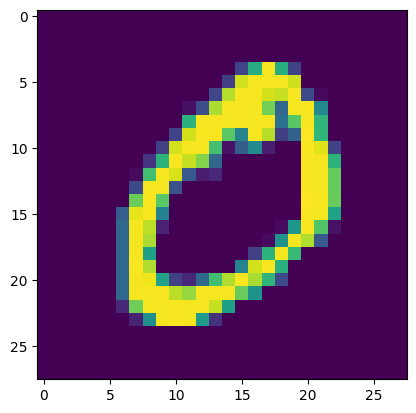

In [6]:
import numpy as np
import matplotlib.pyplot as plt
index =1
# Imprimir las etiquetas y la imagen
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
#Visualiza la imagen
plt.imshow(training_images[index])

In [7]:
#Normalizar los valores del tren y probar las imágenes
training_images = training_images /255.0
test_images =test_images/255.0


In [8]:
#from sklearn.model_selection import train_test_split
#training_images, training_labels, Val_images, Val_labels = train_test_split(training_images, training_labels, test_size=0.3)

In [9]:
#Construir el modelo de clasificación
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [10]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Interpretación de los datos

Para entender el calculó del número de parámetros (Param #):

###Flatten:

Convierte la entrada en una forma plana. En este caso, la entrada es de tamaño (None, 28, 28) y se aplana a (None, 784).
No tiene parámetros entrenables, por lo que Param # es 0.


###Primera capa dense:

Esta es una capa densa (totalmente conectada) con 128 neuronas.
La entrada a esta capa es de tamaño (None, 784), que proviene de la capa aplanada.

Cada neurona en la capa densa tiene un peso asociado con cada una de las 784 entradas más un sesgo (bias) adicional.

Entonces, el número de parámetros para esta capa es:
Número de parámetros = (número de entradas x número de neuronas)+ núm

Número de parámetros = (784 x 128) + 128 = 100352 + 128 =100480


##Segunda capa dense_1:

Esta es una capa densa con 10 neuronas.
La entrada a esta capa es de tamaño (None, 128), que proviene de la capa densa anterior.

Cada neurona en esta capa tiene un peso asociado con cada una de las 128 entradas más un sesgo adicional.
Entonces, el número de parámetros para esta capa es:

Número de parámetros = (número de entradas x número de neuronas)+ núm

Número de parámetros=(128x10)+10=1280+10=1290

Sumando todos los parámetros entrenables:

Capa flatten: 0 parámetros

Capa dense: 100480 parámetros

Capa dense_1: 1290 parámetros

El total de parámetros entrenables en el modelo es:

Total de parametros = 0 + 100480 + 1290 = 101770


In [11]:
#Entrenar el modelo
history =model.fit(training_images, training_labels, epochs=10)
#validation_data=(X_val, Y_val))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2550 - accuracy: 0.9280
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1144 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0784 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0583 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0272 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0177 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

<Axes: >

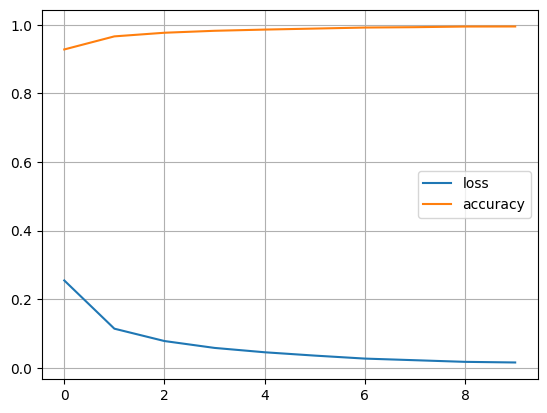

In [12]:
#Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [13]:
#Evaluar el modelo de conjunto de entrenamiento
loss,accuracy = model.evaluate(training_images,training_labels)
print("Perdida en el conjunto de entrenamiento:", loss)
print("Precisión en ele conjunto de entrenamiento:",accuracy)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9967
Perdida en el conjunto de entrenamiento: 0.010901147499680519
Precisión en ele conjunto de entrenamiento: 0.9967166781425476


In [14]:
#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images,test_labels)
print("Perdidad en el conjunto de prueba:",loss)
print("Perdidad en el conjunto de prueba:",accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9776
Perdidad en el conjunto de prueba: 0.08473008126020432
Perdidad en el conjunto de prueba: 0.9775999784469604


In [15]:
#Evaluar el modelo de datos no vistos
loss, accuracy =model.evaluate(test_images, test_labels)
print("Perdida en el conjunto de prueba:",loss)
print("Precisión en el conjunto de prueba:", accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9776
Perdida en el conjunto de prueba: 0.08473008126020432
Precisión en el conjunto de prueba: 0.9775999784469604


In [17]:
#Compilar el modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
#Entrenar el modelo
history =model.fit(training_images, training_labels, epochs=10)
#validation_data=(X_val, Y_val))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0074 - accuracy: 0.9982
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0056 - accuracy: 0.9990
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0050 - accuracy: 0.9992
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0046 - accuracy: 0.9994
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0043 - accuracy: 0.9994
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0040 - accuracy: 0.9996
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0038 - accuracy: 0.9996
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0037 - accuracy: 0.9996
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.003

<Axes: >

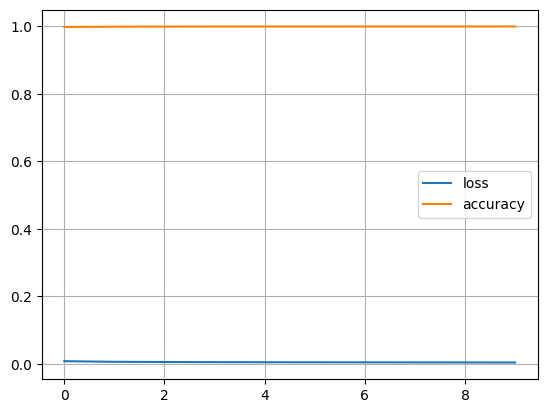

In [19]:
#Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

313/313 [==============================] - 1s 2ms/step
  optimizer  units  epochs  accuracy     mse        r2
0      adam     64      20    0.9737  0.4921  0.941313
1      adam    128      20    0.9778  0.4106  0.951033
2      adam    256      20    0.9803  0.3755  0.955219
3       sgd     64      20    0.9612  0.7700  0.908172
4       sgd    128      20    0.9624  0.7361  0.912214
5       sgd    256      20    0.9679  0.6198  0.926084
6   rmsprop     64      20    0.9741  0.4570  0.945499
7   rmsprop    128      20    0.9786  0.3909  0.953382
8   rmsprop    256      20    0.9813  0.3483  0.958463


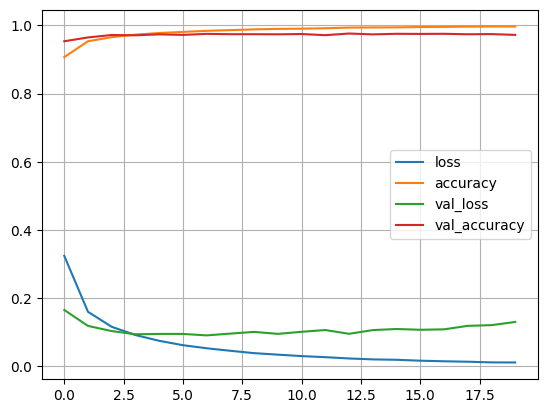

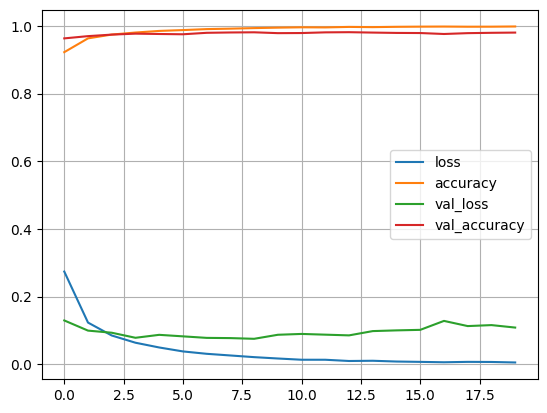

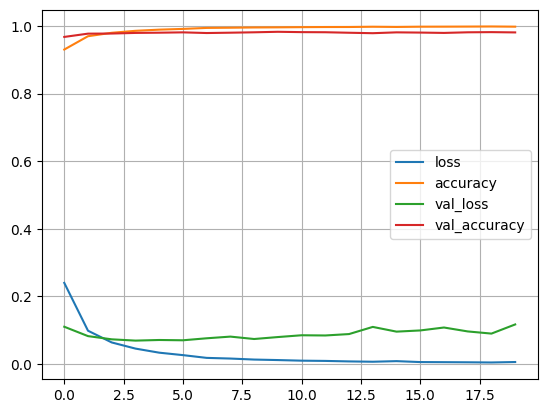

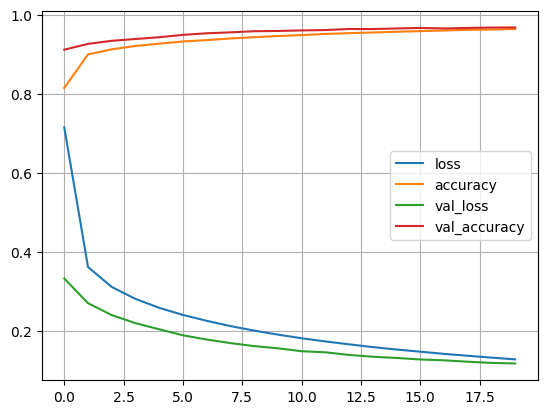

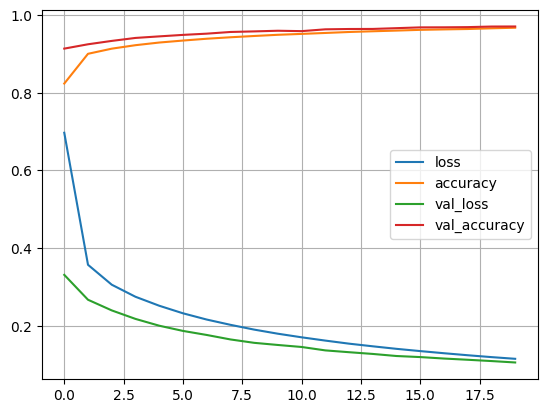

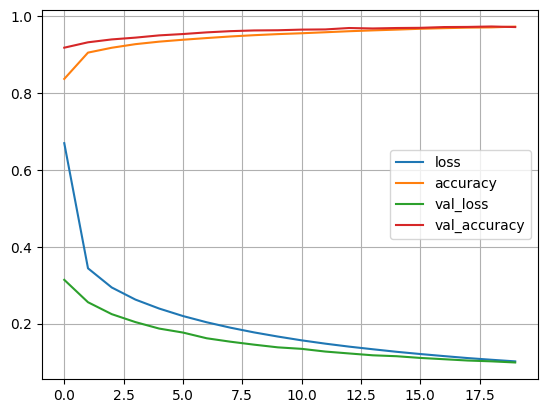

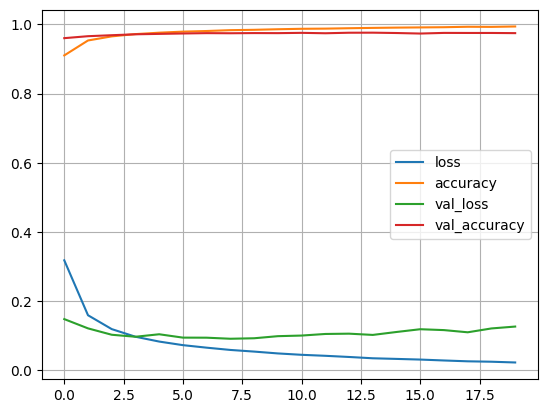

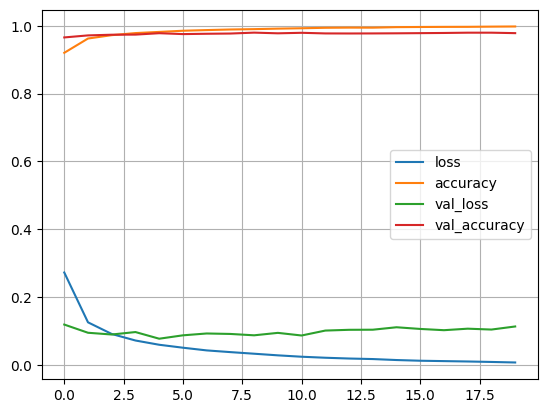

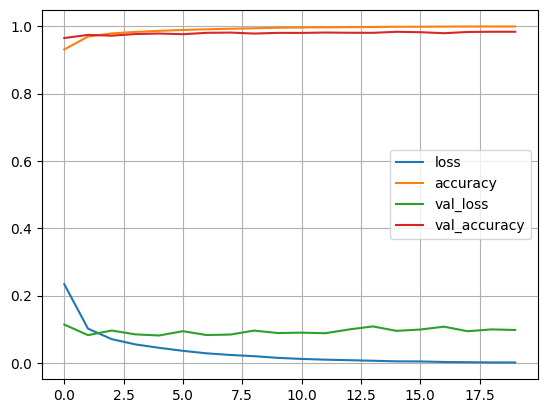

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import pandas as pd

# Cargar el dataset MNIST
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

# Definir la función para crear y compilar el modelo
def create_model(optimizer='adam', units=128):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(units, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Lista de hiperparámetros para probar
optimizers = ['adam', 'sgd', 'rmsprop']
units = [64, 128, 256]
epochs = 20

# Tabla para almacenar los resultados
results = []

# Realizar la búsqueda en cuadrícula
for optimizer in optimizers:
    for unit in units:
        model = create_model(optimizer=optimizer, units=unit)
        history = model.fit(training_images, training_labels, epochs=epochs, validation_split=0.1, verbose=0)

        # Evaluar el modelo
        test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
        predictions = model.predict(test_images)
        pred_labels = predictions.argmax(axis=1)

        # Calcular métricas
        mse = mean_squared_error(test_labels, pred_labels)
        r2 = r2_score(test_labels, pred_labels)

        #Graficar el historial de entrenamiento:
        pd.DataFrame(history.history).plot(grid=True)

        # Almacenar los resultados
        results.append({
            'optimizer': optimizer,
            'units': unit,
            'epochs': epochs,
            'accuracy': test_accuracy,
            'mse': mse,
            'r2': r2
        })

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostrar la tabla resumen
print(results_df)
